In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
two_blobs = pd.read_csv('../DATA/cluster_two_blobs.csv')

In [3]:
two_blobs_outliers = pd.read_csv('../DATA/cluster_two_blobs_outliers.csv')

<Axes: xlabel='X1', ylabel='X2'>

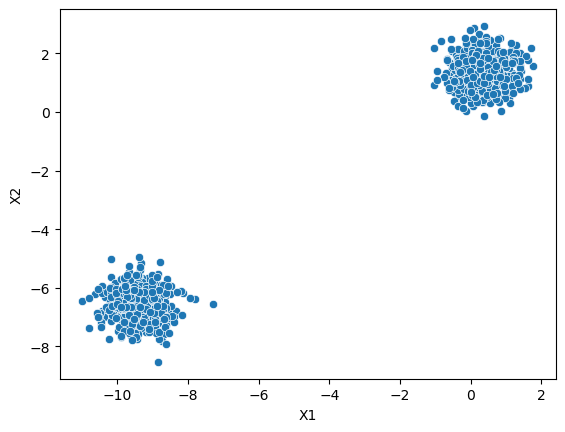

In [4]:
sns.scatterplot(two_blobs, x='X1', y='X2')

<Axes: xlabel='X1', ylabel='X2'>

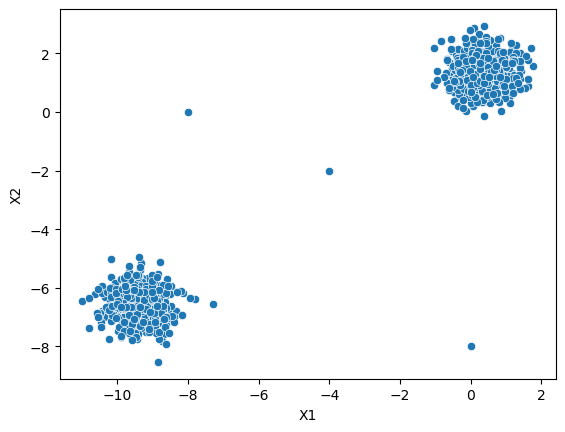

In [5]:
sns.scatterplot(two_blobs_outliers, x='X1', y='X2')

## Label Discovery

In [6]:
def display_categories(model,data):
    labels = model.fit_predict(data)
    sns.scatterplot(data, x='X1', y='X2', hue=labels, palette='Set1')

## DBSCAN

In [7]:
from sklearn.cluster import DBSCAN

In [8]:
dbscan = DBSCAN()

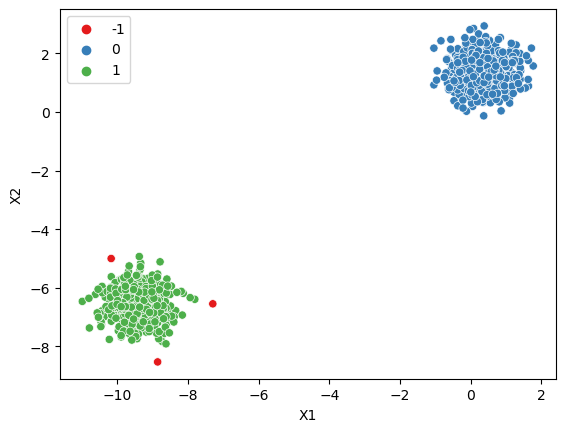

In [9]:
display_categories(dbscan, two_blobs)

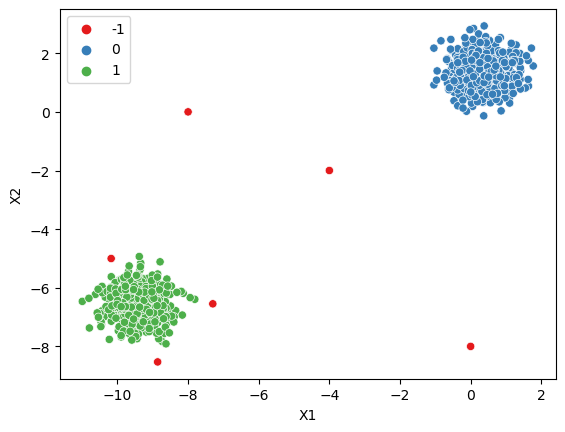

In [10]:
display_categories(dbscan, two_blobs_outliers)

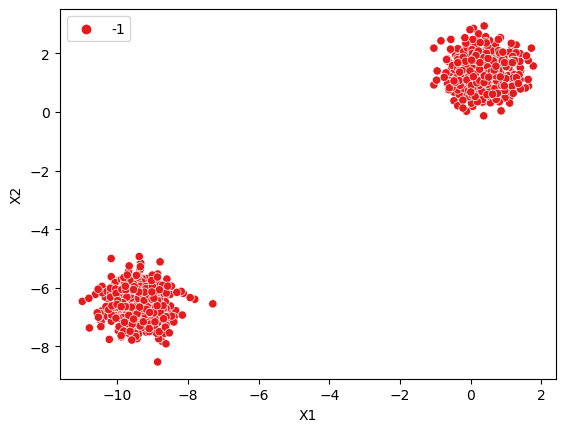

In [11]:
# Tiny Epsilon --> Tiny Max Distance --> Everything is an outlier (class=-1)
dbscan = DBSCAN(eps=.001)
display_categories(dbscan, two_blobs)

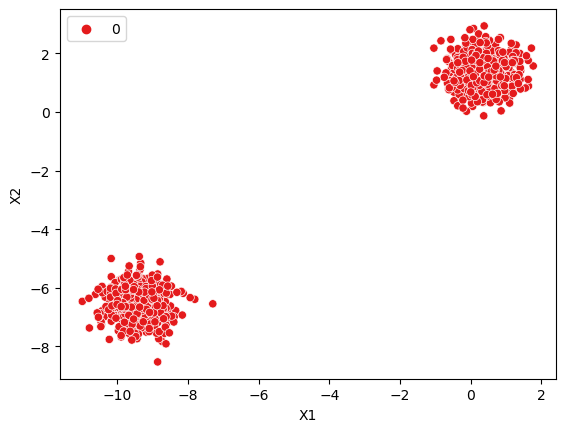

In [12]:
dbscan = DBSCAN(eps=10)
display_categories(dbscan, two_blobs)

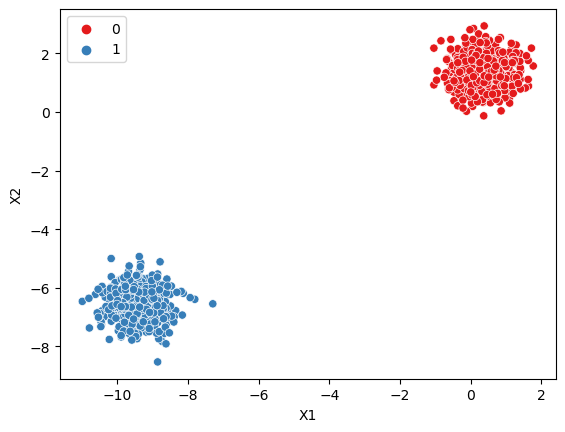

In [13]:
# Huge Epsilon --> Huge Max Distance --> Everything is in the same cluster (class=0)
dbscan = DBSCAN(eps=1)
display_categories(dbscan, two_blobs)

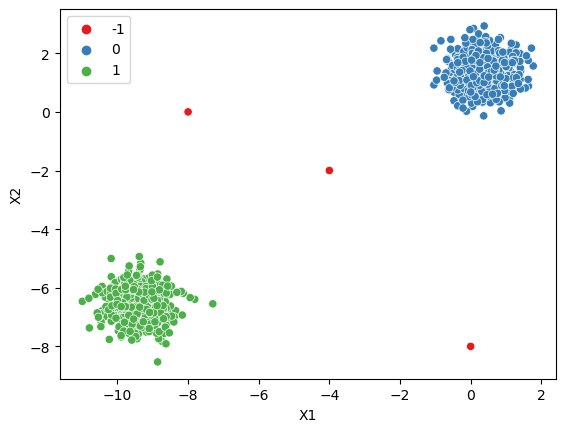

In [16]:
# How to find a good epsilon?
dbscan = DBSCAN(eps=1)
display_categories(dbscan, two_blobs_outliers)

In [17]:
# Total outliers Found
np.sum(dbscan.labels_ == -1)

3

In [19]:
outlier_percent = []
nb_of_outliers = []

for eps in np.linspace(.001,10,100):
    
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(two_blobs_outliers)
    
    # Total Outliers Found
    nb_of_outliers.append(np.sum(dbscan.labels_ == -1))
    
    # Percent of points classified as outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

<Axes: >

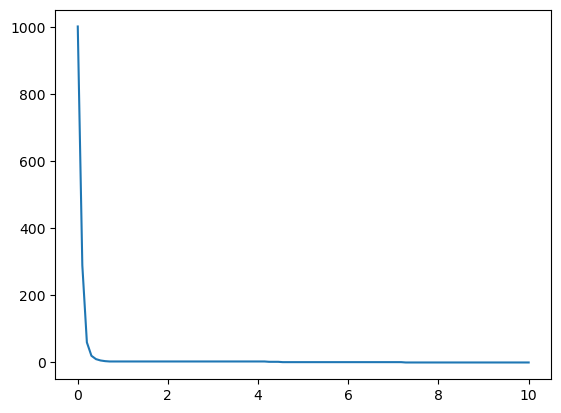

In [20]:
sns.lineplot(x=np.linspace(.001,10,100), y=nb_of_outliers)

(0.0, 1.0)

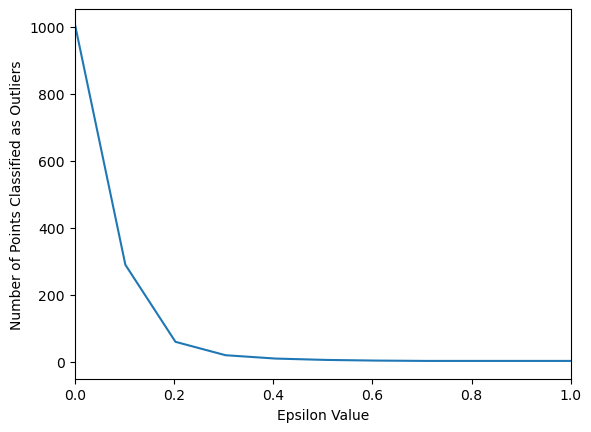

In [22]:
sns.lineplot(x=np.linspace(0.001,10,100),y=nb_of_outliers)
plt.ylabel("Number of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.xlim(0,1)

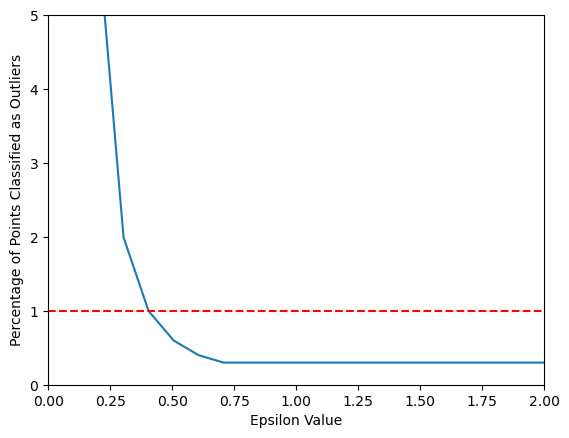

In [23]:
sns.lineplot(x=np.linspace(0.001,10,100),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.ylim(0,5)
plt.xlim(0,2)
plt.hlines(y=1,xmin=0,xmax=2,colors='red',ls='--');

### Do we want to think in terms of number of outliers targeting instead?

If so, you could "target" a number of outliers, such as 3 points as outliers.

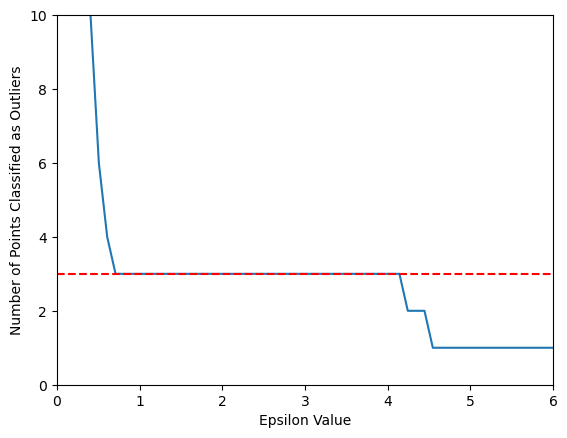

In [25]:
sns.lineplot(x=np.linspace(0.001,10,100),y=nb_of_outliers)
plt.ylabel("Number of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.ylim(0,10)
plt.xlim(0,6)
plt.hlines(y=3,xmin=0,xmax=10,colors='red',ls='--')